In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [59]:
# Load in the data and scale it
df = pd.read_csv('Encoded_data_3000_V3.csv', index_col=0)

In [60]:
df.columns

Index(['Category_Bamboos', 'Category_Bromeliads',
       'Category_Cacti & Succulents', 'Category_Climbers',
       'Category_Creepers & Vines', 'Category_Ferns',
       'Category_Flowering Pot Plants', 'Category_Fruit Plants',
       'Category_Grasses & Grass like plants', 'Category_Groundcovers_lawns',
       'Category_Indoor Plants', 'Category_Lilies & Bulbous plants',
       'Category_Medicinal Plants', 'Category_Orchids',
       'Category_Palms and Cycads', 'Category_Rose_Hybrid_Climbers',
       'Category_Rose_Miniature_Floribundas', 'Category_Shrubs',
       'Category_Spice plants & edible Herbs',
       'Category_Terrific Tropicals  The Ideal Gifts', 'Category_Trees',
       'Category_Vegetable', 'Category_Water & Aquatic Plants',
       'Flowering_Season_Apr_May_Summer', 'Flowering_Season_Dec_Jan_Winter',
       'Flowering_Season_Feb_Mar_Spring',
       'Flowering_Season_Flowers are inconspicuous',
       'Flowering_Season_Flowers once in many years',
       'Flowering_Season_

In [61]:
df

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers_lawns,...,Spread_or_Width_1 to 2 meters,Spread_or_Width_2 to 4 meters,Spread_or_Width_4 to 6 meters,Spread_or_Width_6 to 8 meters,Spread_or_Width_8 to 12 meters,Spread_or_Width_More than 12 meters,Spread_or_Width_less_than_1_meter,Water_Normal,Water_Requires_less,Water_Requires_more
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,1,1


In [62]:
kmean_data = df.copy()
kmean_data

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers_lawns,...,Spread_or_Width_1 to 2 meters,Spread_or_Width_2 to 4 meters,Spread_or_Width_4 to 6 meters,Spread_or_Width_6 to 8 meters,Spread_or_Width_8 to 12 meters,Spread_or_Width_More than 12 meters,Spread_or_Width_less_than_1_meter,Water_Normal,Water_Requires_less,Water_Requires_more
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,1,1


In [63]:
# Perform k-means clustering with k-means++ initialization
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(kmean_data)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [64]:
# Get cluster labels
cluster_labels = kmeans.labels_

In [65]:
# Add cluster labels to the original data
kmean_data['Cluster'] = cluster_labels

# Display the count of data points in each cluster
print(kmean_data['Cluster'].value_counts())

2    605
1    603
0    498
3    494
4    162
Name: Cluster, dtype: int64


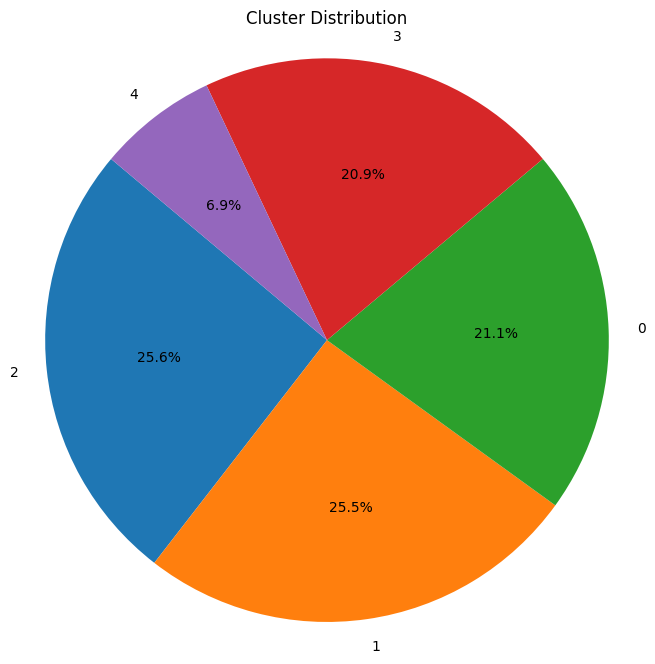

In [66]:
# Calculate the count of data points in each cluster
cluster_counts = kmean_data['Cluster'].value_counts()

# Visualize cluster distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cluster Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [67]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(kmean_data, cluster_labels)
silhouette_avg

0.18535300007700606

## Hyperparameter Tuning

In [39]:
new_data=df.copy()

In [40]:
new_data

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers_lawns,...,Spread_or_Width_1 to 2 meters,Spread_or_Width_2 to 4 meters,Spread_or_Width_4 to 6 meters,Spread_or_Width_6 to 8 meters,Spread_or_Width_8 to 12 meters,Spread_or_Width_More than 12 meters,Spread_or_Width_less_than_1_meter,Water_Normal,Water_Requires_less,Water_Requires_more
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,1,1


In [41]:
# Define a range of cluster numbers to try
cluster_range = range(2, 40)  # Adjust the range as needed

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over the range of cluster numbers
for n_clusters in cluster_range:
    # Initialize K-means model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    
    # Fit K-means model to the data
    kmeans.fit(new_data)
    
    # Get cluster labels for each data point
    cluster_labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(new_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

In [42]:
# Iterate over the range of cluster numbers
for n_clusters, score in zip(cluster_range, silhouette_scores):
    print(f"Number of clusters: {n_clusters}, Silhouette score: {score}")

Number of clusters: 2, Silhouette score: 0.12486169789359908
Number of clusters: 3, Silhouette score: 0.11809464669677262
Number of clusters: 4, Silhouette score: 0.10451595600015198
Number of clusters: 5, Silhouette score: 0.10430814370768067
Number of clusters: 6, Silhouette score: 0.11685899900090589
Number of clusters: 7, Silhouette score: 0.125410281384967
Number of clusters: 8, Silhouette score: 0.1290176169363482
Number of clusters: 9, Silhouette score: 0.1290994591382013
Number of clusters: 10, Silhouette score: 0.13926042606977737
Number of clusters: 11, Silhouette score: 0.13773971726841913
Number of clusters: 12, Silhouette score: 0.14595093414360355
Number of clusters: 13, Silhouette score: 0.15336011181298217
Number of clusters: 14, Silhouette score: 0.15158573408480616
Number of clusters: 15, Silhouette score: 0.1571923047313638
Number of clusters: 16, Silhouette score: 0.16376452916963066
Number of clusters: 17, Silhouette score: 0.16566258190260996
Number of clusters: 1

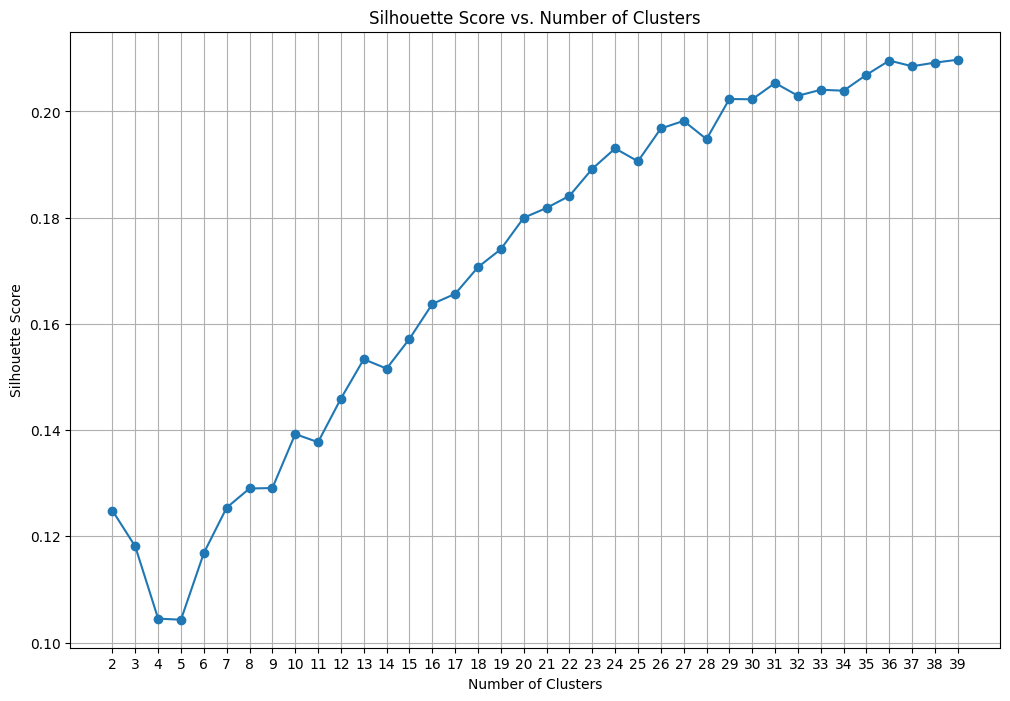

In [43]:
# Plot the silhouette scores for different numbers of clusters
plt.figure(figsize=(12, 8))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [45]:
# Find the optimal k and corresponding silhouette score
optimal_k = cluster_range[np.argmax(silhouette_scores)]
max_silhouette_score = max(silhouette_scores)
print(f"\nOptimal k: {optimal_k}")
print(f"Corresponding Silhouette Score: {max_silhouette_score}")


Optimal k: 39
Corresponding Silhouette Score: 0.20974206681668522


## Cluster distribution

In [76]:
cluster_data=df.copy()
cluster_data

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers_lawns,...,Spread_or_Width_1 to 2 meters,Spread_or_Width_2 to 4 meters,Spread_or_Width_4 to 6 meters,Spread_or_Width_6 to 8 meters,Spread_or_Width_8 to 12 meters,Spread_or_Width_More than 12 meters,Spread_or_Width_less_than_1_meter,Water_Normal,Water_Requires_less,Water_Requires_more
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,1,1


In [77]:
optimal_data = cluster_data.copy()
optimal_data

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers_lawns,...,Spread_or_Width_1 to 2 meters,Spread_or_Width_2 to 4 meters,Spread_or_Width_4 to 6 meters,Spread_or_Width_6 to 8 meters,Spread_or_Width_8 to 12 meters,Spread_or_Width_More than 12 meters,Spread_or_Width_less_than_1_meter,Water_Normal,Water_Requires_less,Water_Requires_more
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,1,1


In [78]:
# Initialize K-means model with a different number of clusters
kmeans = KMeans(n_clusters=39,init='k-means++', random_state=42)  # Adjust the number of clusters as needed

# Fit K-means model to the data
kmeans.fit(cluster_data)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original data
optimal_data['Cluster'] = cluster_labels

# Display the count of data points in each cluster
print(optimal_data['Cluster'].value_counts())

# Calculate the silhouette score
silhouette_avg = silhouette_score(cluster_data, cluster_labels)

print("The average silhouette score is:", silhouette_avg)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


14    172
6     148
25    108
31     99
9      95
13     84
38     80
19     71
8      71
12     70
18     65
10     64
29     63
16     62
20     62
23     61
21     60
26     59
22     59
36     56
33     55
27     55
30     51
2      48
5      48
7      45
28     45
3      44
1      41
17     39
11     39
15     38
24     36
4      33
34     33
32     32
37     24
0      24
35     23
Name: Cluster, dtype: int64
The average silhouette score is: 0.20974206681668522


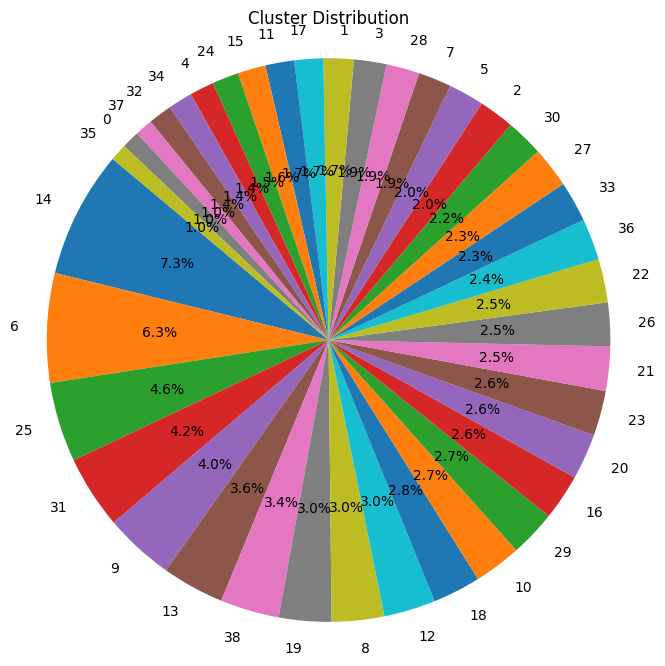

In [79]:
# Calculate the count of data points in each cluster
cluster_counts = optimal_data['Cluster'].value_counts()

# Visualize cluster distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cluster Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [80]:
optimal_data1 = df.copy()
optimal_data1

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers_lawns,...,Spread_or_Width_1 to 2 meters,Spread_or_Width_2 to 4 meters,Spread_or_Width_4 to 6 meters,Spread_or_Width_6 to 8 meters,Spread_or_Width_8 to 12 meters,Spread_or_Width_More than 12 meters,Spread_or_Width_less_than_1_meter,Water_Normal,Water_Requires_less,Water_Requires_more
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,1,1


In [81]:
cluster_data1 = df.copy()
cluster_data1

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers_lawns,...,Spread_or_Width_1 to 2 meters,Spread_or_Width_2 to 4 meters,Spread_or_Width_4 to 6 meters,Spread_or_Width_6 to 8 meters,Spread_or_Width_8 to 12 meters,Spread_or_Width_More than 12 meters,Spread_or_Width_less_than_1_meter,Water_Normal,Water_Requires_less,Water_Requires_more
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,1,1


In [82]:
# Initialize K-means model with a different number of clusters
kmeans = KMeans(n_clusters=36,init='k-means++', random_state=42)  # Adjust the number of clusters as needed

# Fit K-means model to the data
kmeans.fit(cluster_data1)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original data
optimal_data1['Cluster'] = cluster_labels

# Display the count of data points in each cluster
print(optimal_data['Cluster'].value_counts())

# Calculate the silhouette score
silhouette_avg = silhouette_score(cluster_data1, cluster_labels)

print("The average silhouette score is:", silhouette_avg)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


14    172
6     148
25    108
31     99
9      95
13     84
38     80
19     71
8      71
12     70
18     65
10     64
29     63
16     62
20     62
23     61
21     60
26     59
22     59
36     56
33     55
27     55
30     51
2      48
5      48
7      45
28     45
3      44
1      41
17     39
11     39
15     38
24     36
4      33
34     33
32     32
37     24
0      24
35     23
Name: Cluster, dtype: int64
The average silhouette score is: 0.2095814612591566


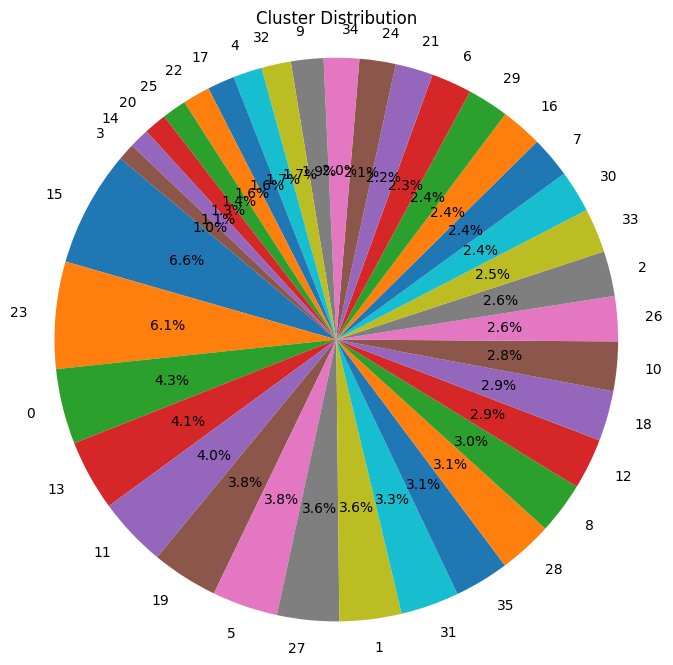

In [83]:
# Calculate the count of data points in each cluster
cluster_counts = optimal_data1['Cluster'].value_counts()

# Visualize cluster distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cluster Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()